In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

/opt/anaconda3/envs/python_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.job_posted_date = pd.to_datetime(df['job_posted_date'])
df.job_skills = df.job_skills.apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [6]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [9]:
df_DA_US = df_DA_US.explode(column='job_skills')

In [44]:
df_DA_US_grouped = df_DA_US.groupby(by='job_skills')['salary_year_avg'].agg(['count', 'median'])

In [45]:
df_DA_US_grouped

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [64]:
df_top_skills = df_DA_US_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [65]:
df_paying_skills = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)

In [66]:
df_paying_skills

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [67]:
df_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


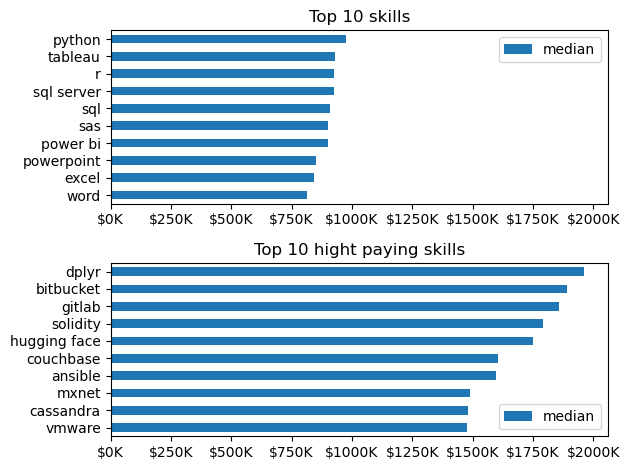

In [85]:
fig, ax = plt.subplots(2,1)

df_top_skills[::-1].plot(kind='barh', y='median', ax= ax[0])
ax[0].set_title('Top 10 skills')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/100)}K'))

df_paying_skills.plot(kind='barh', y='median', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Top 10 hight paying skills')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))

ax[0].set_xlim(ax[1].get_xlim())

plt.tight_layout()